In [249]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns # Might not need this


              bond_id                  date  1_month  2_month  3_month  \
0  100881783200940535  2021-11-05 00:00:00      0.05     0.06     0.05   
1  100881783200940535  2021-11-08 00:00:00      0.04     0.06     0.06   
2  100881783200940535  2021-11-09 00:00:00      0.04     0.05     0.04   
3  100881783200940535  2021-11-10 00:00:00      0.06     0.06     0.05   
4  100881783200940535  2021-11-12 00:00:00      0.05     0.05     0.05   

   6_month  1_year  2_year  3_year  5_year  7_year  10_year  20_year  30_year  
0     0.07    0.14    0.39    0.66    1.04    1.30     1.45     1.88     1.87  
1     0.07    0.16    0.45    0.75    1.13    1.38     1.51     1.91     1.89  
2     0.06    0.14    0.41    0.71    1.08    1.32     1.46     1.86     1.83  
3     0.07    0.17    0.51    0.83    1.23    1.45     1.56     1.96     1.92  
4     0.07    0.17    0.53    0.85    1.24    1.47     1.58     1.99     1.95  


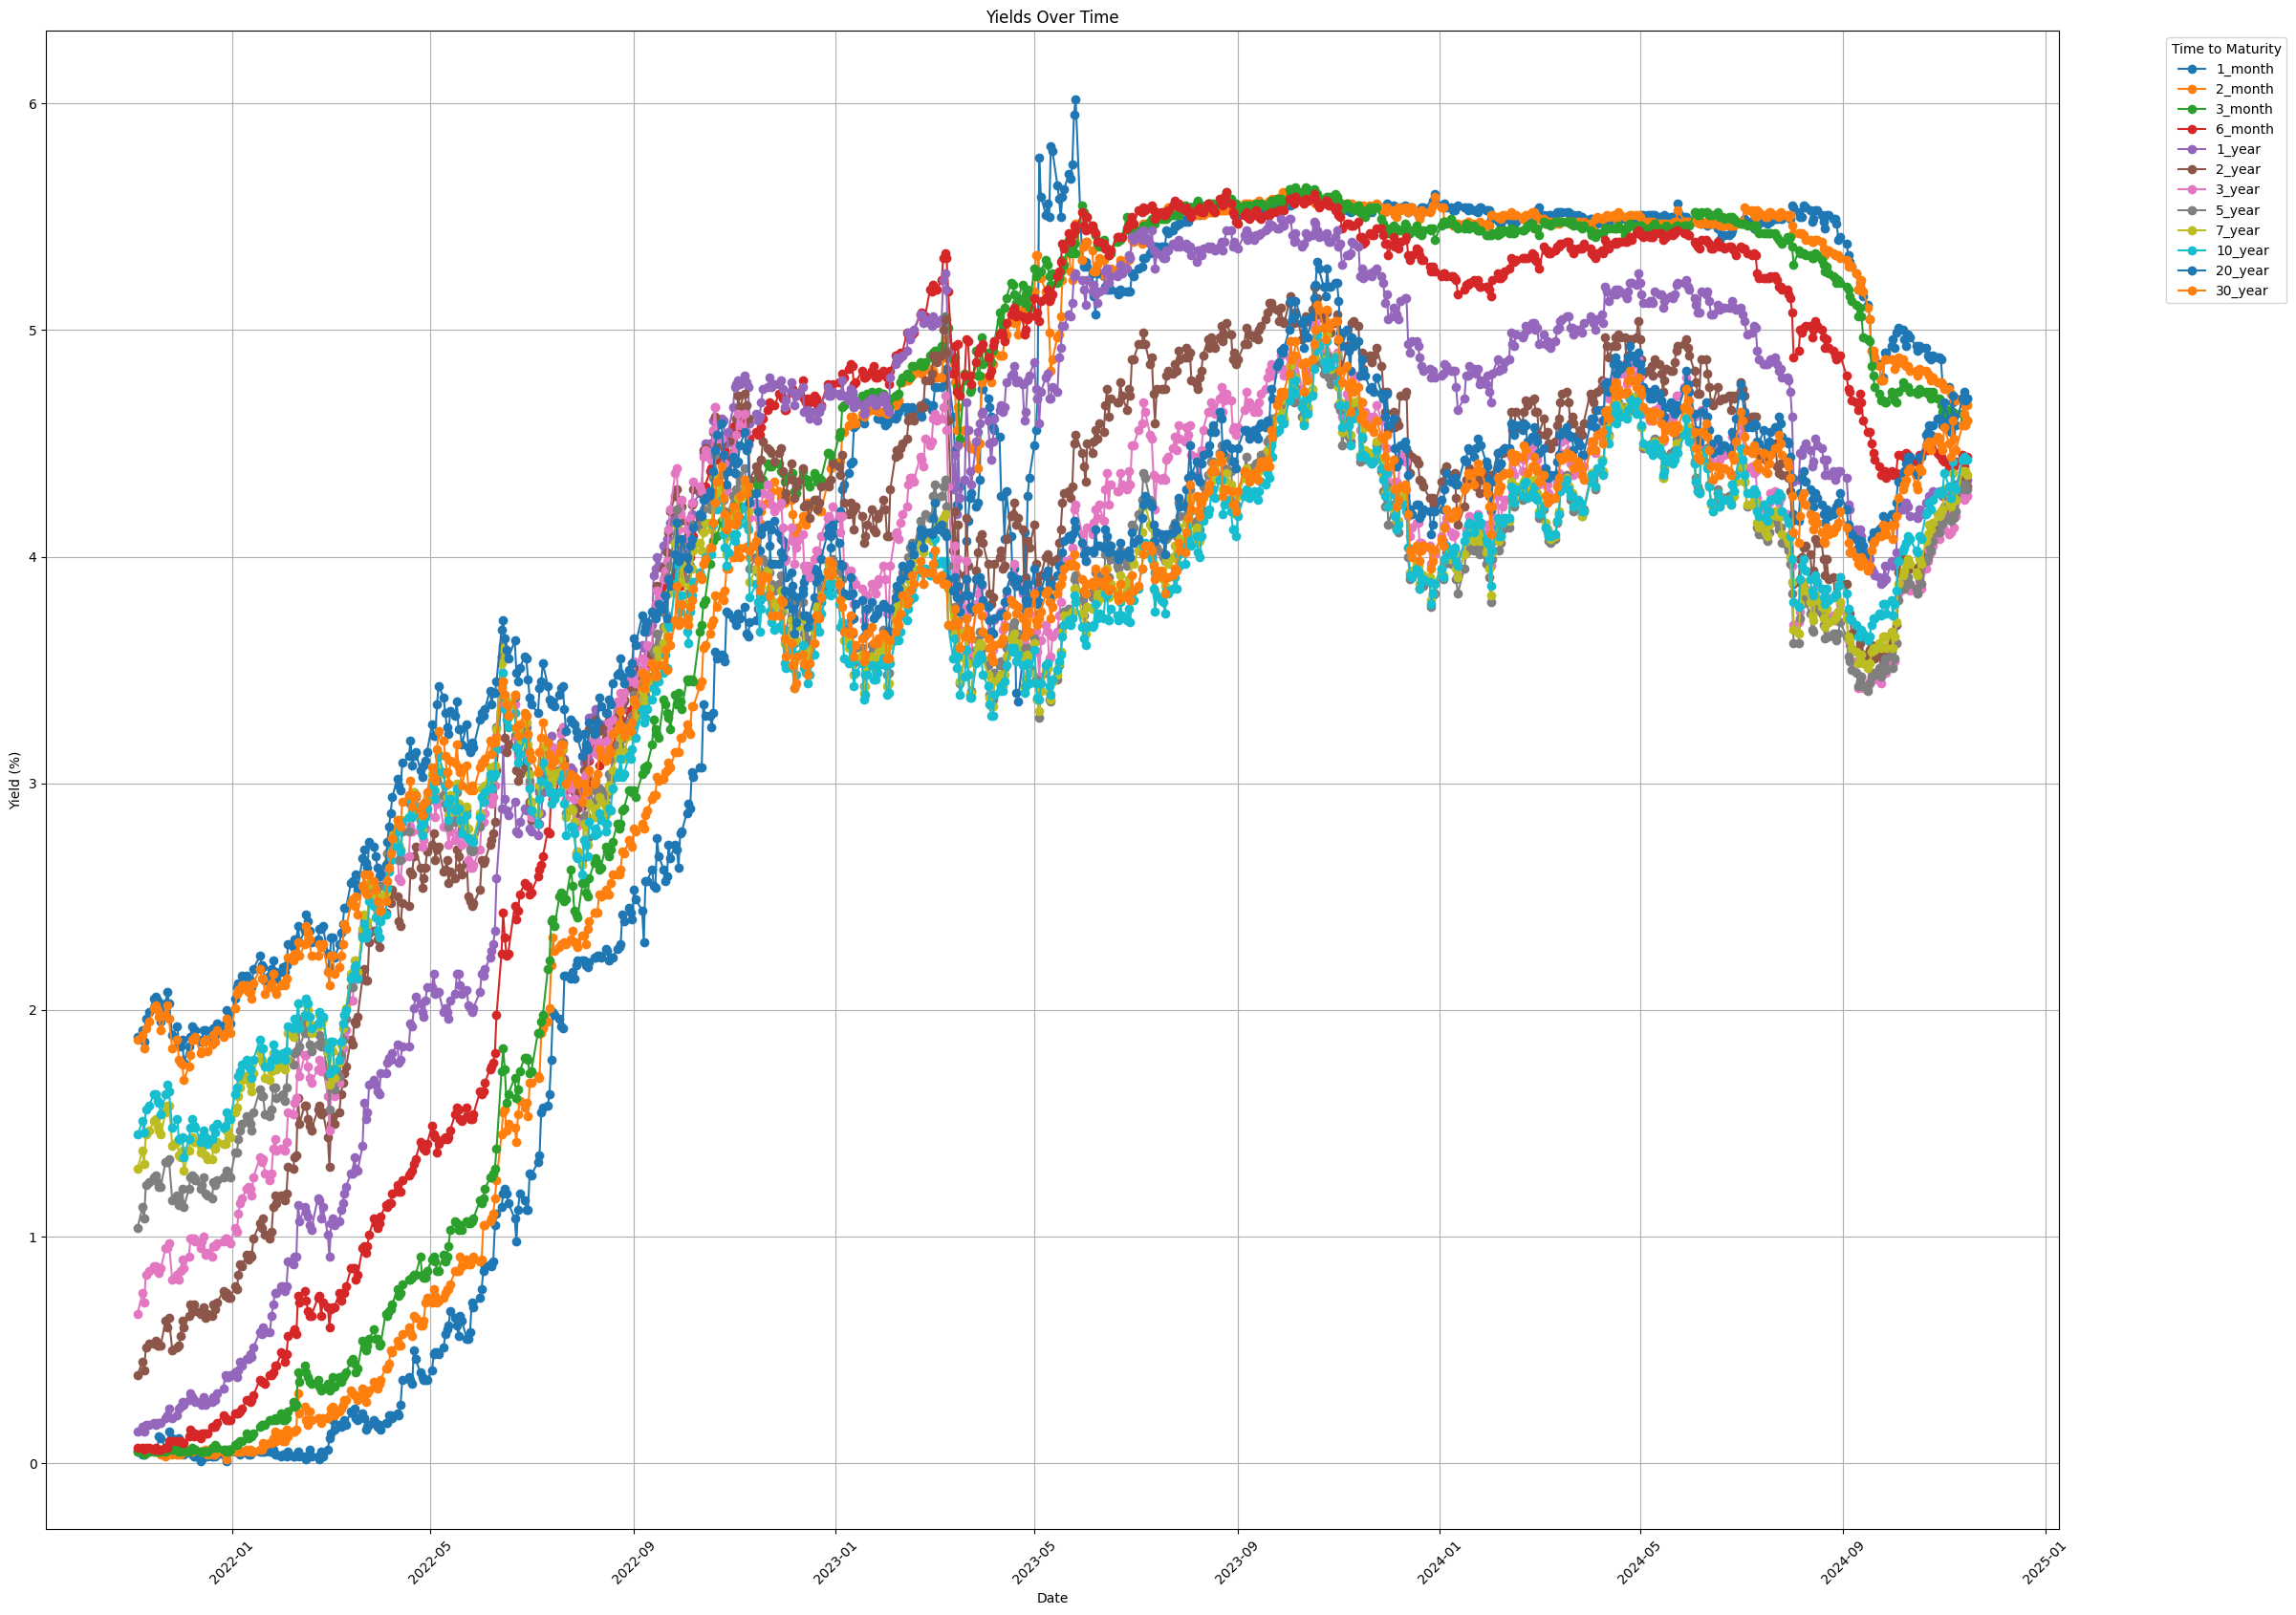

In [250]:


# Updated file path
filePath = "../data/bond_values.csv"

# Read the CSV file with semicolon delimiter and handle the quotes
data = pd.read_csv(filePath, delimiter=';', quotechar='"')

# Strip any leading or trailing spaces from the column names
data.columns = data.columns.str.strip()

# Print the first few rows to inspect the data
print(data.head())

# Check if the 'date' column is correctly recognized
if 'date' not in data.columns:
    print("The 'date' column is not found in the dataset!")
else:
    # Convert the 'date' column to datetime
    data['date'] = pd.to_datetime(data['date'])
    data['date'] = data['date'].dt.date

    # Select only the relevant columns
    yield_columns = ['1_month', '2_month', '3_month', '6_month', '1_year', 
                     '2_year', '3_year', '5_year', '7_year', '10_year', 
                     '20_year', '30_year']
    selected_data = data[['date'] + yield_columns]

    # Plot a line chart
    plt.figure(figsize=(24, 17))
    for column in yield_columns:
        plt.plot(selected_data['date'], selected_data[column], marker='o', label=column)

    plt.title("Yields Over Time")
    plt.xlabel("Date")
    plt.ylabel("Yield (%)")
    plt.legend(title="Time to Maturity", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("Bonds.png")
    plt.show()



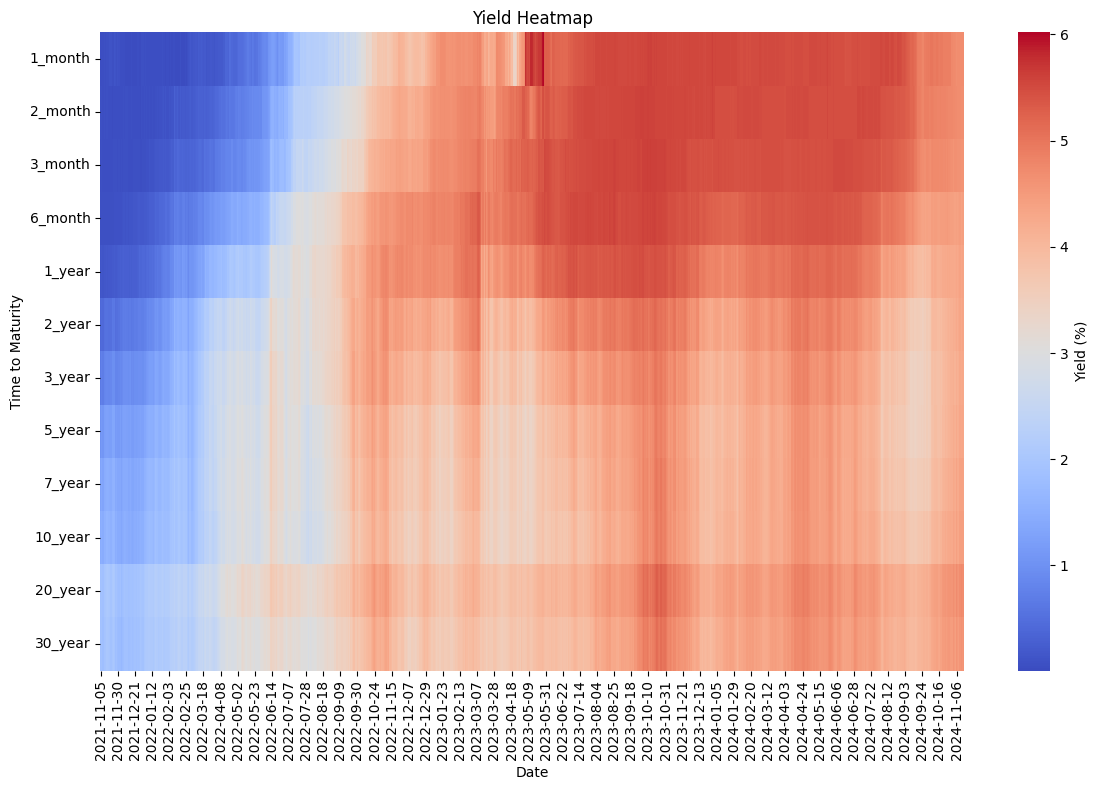

In [251]:
heatmap_data = selected_data.set_index('date').T  # Transpose for easier heatmap plotting

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=False, cmap="coolwarm", cbar_kws={"label": "Yield (%)"})
plt.title("Yield Heatmap")
plt.xlabel("Date")
plt.ylabel("Time to Maturity")
plt.tight_layout()
plt.show()

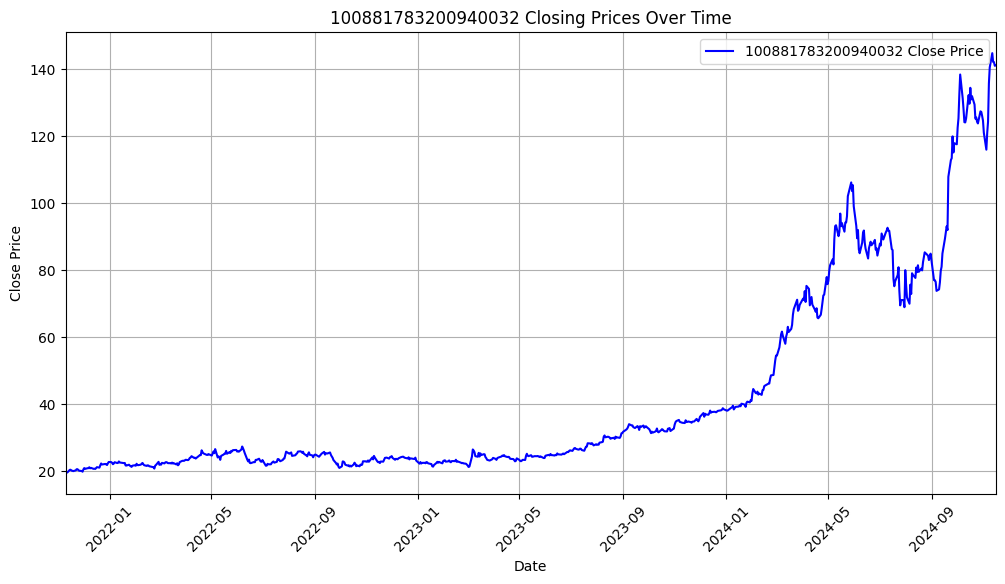

In [254]:

# Updated file path
filePath = "../data/historical_stock_values.csv"
data = pd.read_csv(filePath, delimiter=';', quotechar='"')
data['date'] = pd.to_datetime(data['date'])

company_symbol = 100881783200940032
filtered_data = data[data['company_id'] == company_symbol]

# Strip any leading or trailing spaces from the column names
data.columns = data.columns.str.strip()


if 'date' not in data.columns:
    print("The 'date' column is not found in the dataset!")
else:

    # Plot closing prices
    plt.figure(figsize=(12, 6))
    plt.plot(filtered_data['date'], filtered_data['close'], label=f'{company_symbol} Close Price', color='blue')
    plt.title(f"{company_symbol} Closing Prices Over Time")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.grid()
    plt.xticks(rotation=45)
    plt.legend()
    plt.xlim(filtered_data['date'].min(), filtered_data['date'].max())
    plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
filePath = "../data/historical_stock_values.csv"
data = pd.read_csv(filePath, delimiter=';', quotechar='"')
data['date'] = pd.to_datetime(data['date'])
company_symbol = 100881783200940032
filtered_data = data[data['company_id'] == company_symbol]

x = filtered_data[['close']]
y = filtered_data[['open', 'high', 'low', 'volume', 'vwap']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)


model3 = RandomForestRegressor(oob_score=True)
model3.fit(X_train,y_train)


y_pred = model3.predict(X_test)

# Plot Actual vs Predicted for the 'open' price (you can repeat this for other columns if needed)
plt.figure(figsize=(10, 6))

plt.scatter(y_test.index, y_test['open'], color='blue', label='Actual Open Price')
plt.scatter(y_test.index, y_pred[:, 0], color='red', label='Predicted Open Price')

plt.title(f"Actual vs Predicted Open Price for {company_symbol}")
plt.xlabel('Close')
plt.ylabel('Price')
plt.legend(loc='upper left')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

RandomForestRegressor(oob_score=True)

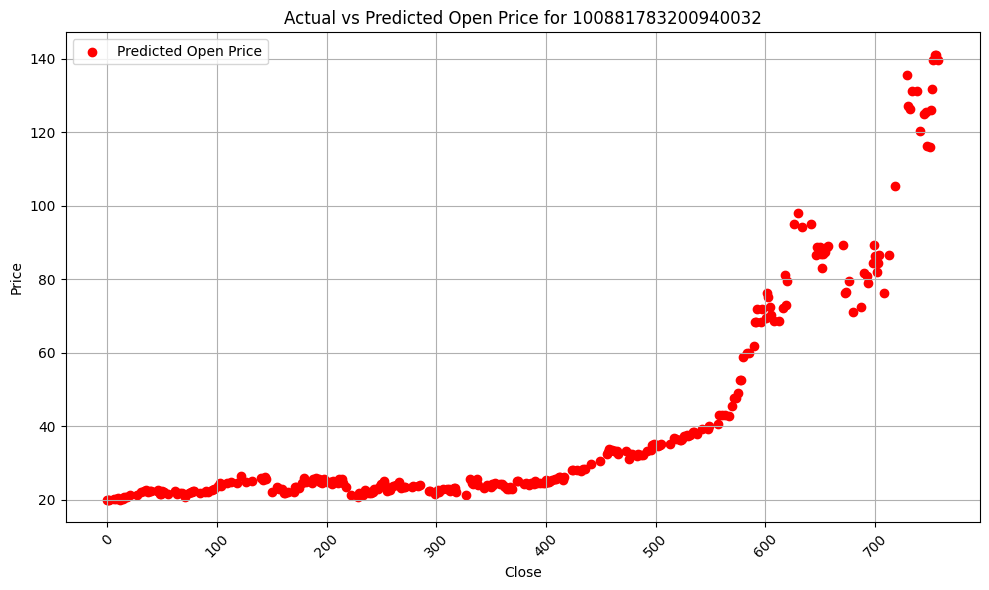

/tmp/ipykernel_3170/3541352919.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[f'close_lag_{lag}'] = filtered_data['close'].shift(lag)
/tmp/ipykernel_3170/3541352919.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[f'close_lag_{lag}'] = filtered_data['close'].shift(lag)
/tmp/ipykernel_3170/3541352919.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

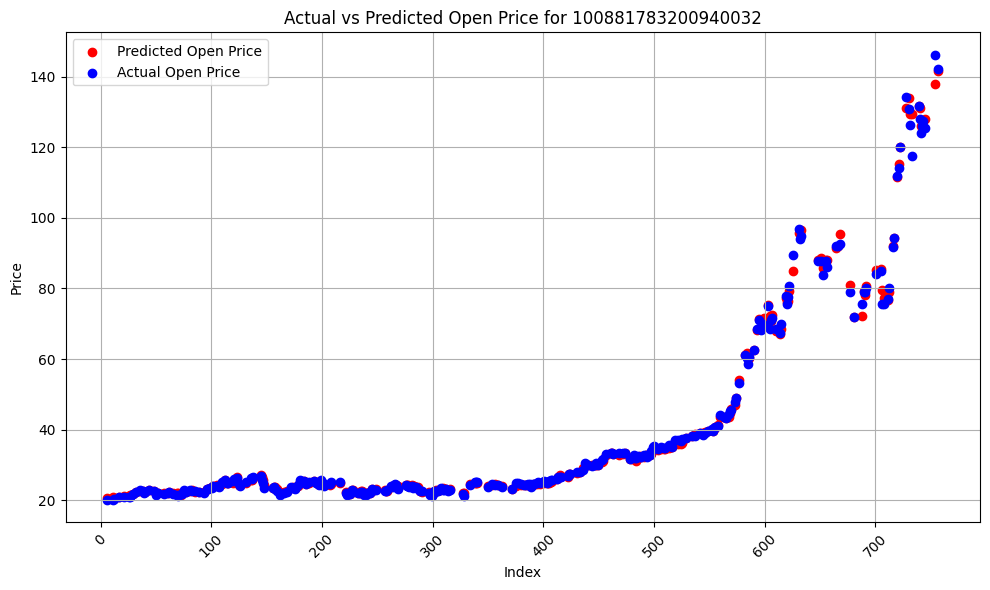

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

filePath = "../data/historical_stock_values.csv"
data = pd.read_csv(filePath, delimiter=';', quotechar='"')
data['date'] = pd.to_datetime(data['date'])

company_symbol = 100881783200940032
filtered_data = data[data['company_id'] == company_symbol]

# Creating lagged features for 'close' price (e.g., 1 day and 2 days ago)
for lag in range(1, 6):  # Change 3 to a higher number to create more lag features
    filtered_data[f'close_lag_{lag}'] = filtered_data['close'].shift(lag)

# Drop rows with NaN values caused by shifting
filtered_data = filtered_data.dropna()

# Define the feature and target variables
x = filtered_data[['close_lag_1', 'close_lag_2']]  # Using 1 and 2 day lag for prediction
y = filtered_data[['open', 'high', 'low', 'volume', 'vwap']]  # Target columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=10)

# Initialize and train the model
model3 = RandomForestRegressor(n_estimators=1000, max_depth=10, min_samples_split=2, oob_score=True)
model3.fit(X_train, y_train)

# Predict the target variables on the test set
y_pred = model3.predict(X_test)

# Plot Actual vs Predicted for the 'open' price
plt.figure(figsize=(10, 6))

# Plot predicted open price
plt.scatter(y_test.index, y_pred[:, 0], color='red', label='Predicted Open Price')
plt.scatter(y_test.index, y_test['open'], color='blue', label='Actual Open Price')

plt.title(f"Actual vs Predicted Open Price for {company_symbol}")
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend(loc='upper left')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
